In [1]:
import talib.abstract as ta
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

In [2]:
# thousands = ','는 ,를 제거하여 출력
today = datetime.today().strftime("%m.%d")
df = pd.read_csv(
    './data/' + today +  ' 000020/000020.csv'
    , encoding = 'utf-8-sig'
    , thousands = ','
)
# label이라는 컬럼 생성 종가를 하나 아래로 내린 것
df['label'] = df['close'].shift(1)

#date컬럼을 datetime 타입으로 변경
df['date'] = pd.to_datetime(df['date'])

# NaN 값 제거
df.dropna(inplace=True)

# date순으로 역정렬
df.sort_values(by='date',ascending=True,inplace=True)

# date를 df의 index로 사용
df.set_index(df['date'], inplace=True)

# 본 df에 date컬럼 삭제
df.drop(['date','prev'], axis=1, inplace = True)

df

,close,open,high,low,volume,label
date,,,,,,
1996-06-25,36000,37700,38400,36000,102200,33900.0
1996-06-26,33900,37000,37400,33900,138040,31900.0
1996-06-27,31900,33700,34400,31900,89110,30000.0
1996-06-28,30000,31000,32300,30000,74300,30000.0
1996-06-29,30000,30000,31000,28600,68780,30500.0
...,...,...,...,...,...,...
2020-10-19,21300,21350,22900,20750,590550,20300.0
2020-10-20,20300,20850,21600,19850,745574,20100.0
2020-10-21,20100,20200,20500,19850,402212,19200.0


In [3]:
split_row = int(len(df['close']) * 0.9899)

In [4]:
type(split_row)

int

In [5]:
timestamp =  df.index[:split_row][-1]

In [6]:
timestamp

Timestamp('2020-07-22 00:00:00')

In [7]:
split_date = pd.Timestamp(timestamp)

In [8]:
split_date

Timestamp('2020-07-22 00:00:00')

In [9]:
test_df = df['label']
train_df = df.drop(['label'],axis=1)

In [10]:
# train = df.loc[:split_date, ['close','open','high','low','volume',]]
# test = df.loc[split_date:, ['label']]
train = df.loc[:split_date, ['close']]
test = df.loc[split_date:, ['close']]

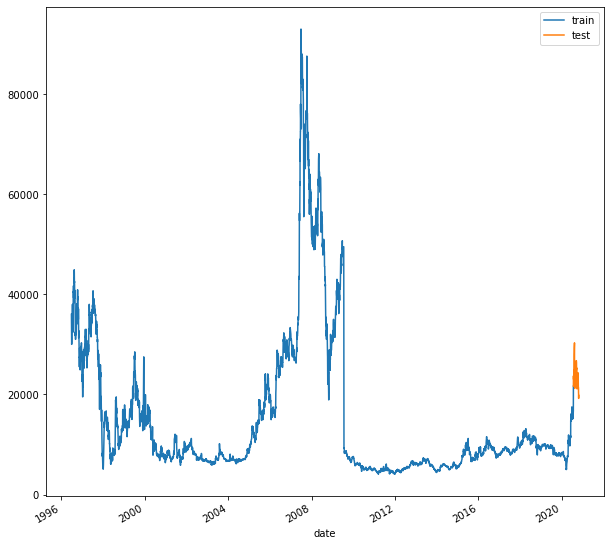

In [11]:
ax = train.plot()
test.plot(ax=ax, figsize = (10,10))
plt.legend(['train','test'])
plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

train_sc

array([[0.35904644],
       [0.33543236],
       [0.31294276],
       ...,
       [0.1375239 ],
       [0.14258405],
       [0.19768357]])

In [13]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)
train_sc_df.head()

,Scaled
date,
1996-06-25,0.359046
1996-06-26,0.335432
1996-06-27,0.312943
1996-06-28,0.291578
1996-06-29,0.291578


In [14]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

train_sc_df.head(13)

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,,
1996-06-25,0.359046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-06-26,0.335432,0.359046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-06-27,0.312943,0.335432,0.359046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-06-28,0.291578,0.312943,0.335432,0.359046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-06-29,0.291578,0.291578,0.312943,0.335432,0.359046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-07-01,0.297200,0.291578,0.291578,0.312943,0.335432,0.359046,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-07-02,0.317441,0.297200,0.291578,0.291578,0.312943,0.335432,0.359046,NaN,NaN,NaN,NaN,NaN,NaN
1996-07-03,0.336557,0.317441,0.297200,0.291578,0.291578,0.312943,0.335432,0.359046,NaN,NaN,NaN,NaN,NaN
1996-07-04,0.359046,0.336557,0.317441,0.297200,0.291578,0.291578,0.312943,0.335432,0.359046,NaN,NaN,NaN,NaN


In [15]:
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

In [16]:
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values
print(X_train.shape)
print(X_train)
print(y_train.shape)
print(y_train)

(6032, 12)
[[0.35117508 0.3444282  0.34217924 ... 0.31294276 0.33543236 0.35904644]
 [0.34555268 0.35117508 0.3444282  ... 0.29157765 0.31294276 0.33543236]
 [0.35229956 0.34555268 0.35117508 ... 0.29157765 0.29157765 0.31294276]
 ...
 [0.1290903  0.12515462 0.13077702 ... 0.12459238 0.1234679  0.12459238]
 [0.1375239  0.1290903  0.12515462 ... 0.12403014 0.12459238 0.1234679 ]
 [0.14258405 0.1375239  0.1290903  ... 0.12515462 0.12403014 0.12459238]]
(6032, 1)
[[0.34555268]
 [0.35229956]
 [0.35904644]
 ...
 [0.1375239 ]
 [0.14258405]
 [0.19768357]]


In [17]:
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)

print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)


최종 DATA
(6032, 12, 1)
[[[0.35117508]
  [0.3444282 ]
  [0.34217924]
  ...
  [0.31294276]
  [0.33543236]
  [0.35904644]]

 [[0.34555268]
  [0.35117508]
  [0.3444282 ]
  ...
  [0.29157765]
  [0.31294276]
  [0.33543236]]

 [[0.35229956]
  [0.34555268]
  [0.35117508]
  ...
  [0.29157765]
  [0.29157765]
  [0.31294276]]

 ...

 [[0.1290903 ]
  [0.12515462]
  [0.13077702]
  ...
  [0.12459238]
  [0.1234679 ]
  [0.12459238]]

 [[0.1375239 ]
  [0.1290903 ]
  [0.12515462]
  ...
  [0.12403014]
  [0.12459238]
  [0.1234679 ]]

 [[0.14258405]
  [0.1375239 ]
  [0.1290903 ]
  ...
  [0.12515462]
  [0.12403014]
  [0.12459238]]]
[[0.34555268]
 [0.35229956]
 [0.35904644]
 ...
 [0.1375239 ]
 [0.14258405]
 [0.19768357]]


In [18]:
print(y_test)

[[0.28426853]
 [0.29495109]
 [0.22860677]
 [0.23479141]
 [0.20780389]
 [0.19262341]
 [0.20161925]
 [0.21173957]
 [0.21117733]
 [0.19768357]
 [0.21398853]
 [0.21567525]
 [0.22129765]
 [0.22129765]
 [0.21342629]
 [0.21792421]
 [0.22017317]
 [0.23479141]
 [0.23928933]
 [0.23760261]
 [0.24153829]
 [0.22017317]
 [0.23029349]
 [0.24603621]
 [0.25503205]
 [0.24997189]
 [0.23985157]
 [0.23591589]
 [0.23872709]
 [0.23591589]
 [0.23591589]
 [0.22467109]
 [0.21455077]
 [0.19149893]
 [0.20274373]
 [0.20161925]
 [0.19993253]
 [0.22523333]
 [0.22129765]
 [0.21848645]
 [0.22579557]
 [0.22410885]
 [0.22748229]
 [0.22242213]
 [0.21005285]
 [0.19655909]
 [0.19374789]
 [0.18250309]
 [0.18025413]
 [0.17013381]
 [0.17688069]]


In [19]:
from keras.layers import LSTM
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping 

K.clear_session()
model = Sequential() # Sequeatial Model 
model.add(LSTM(20, input_shape=(12, 1))) # (timestep, feature) 
model.add(Dense(1)) # output = 1 
model.compile(loss='mean_squared_error', optimizer='adam') 
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                1760      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [20]:
# , patience=10
early_stop = EarlyStopping(monitor='loss', patience=10 , verbose=1)


model.fit(X_train_t, y_train, epochs=100,
          batch_size=30, verbose=1, callbacks=[early_stop])

Epoch 1/100
6032/6032 [==============================] - 1s 138us/step - loss: 0.0022
Epoch 2/100
6032/6032 [==============================] - 1s 99us/step - loss: 6.6593e-04
Epoch 3/100
6032/6032 [==============================] - 1s 99us/step - loss: 6.1010e-04
Epoch 4/100
6032/6032 [==============================] - 1s 98us/step - loss: 5.6989e-04
Epoch 5/100
6032/6032 [==============================] - 1s 95us/step - loss: 5.5820e-04
Epoch 6/100
6032/6032 [==============================] - 1s 97us/step - loss: 5.1264e-04
Epoch 7/100
6032/6032 [==============================] - 1s 94us/step - loss: 4.5806e-04
Epoch 8/100
6032/6032 [==============================] - 1s 94us/step - loss: 4.2278e-04
Epoch 9/100
6032/6032 [==============================] - 1s 94us/step - loss: 3.9121e-04
Epoch 10/100
6032/6032 [==============================] - 1s 95us/step - loss: 3.8173e-04
Epoch 11/100
6032/6032 [==============================] - 1s 94us/step - loss: 3.3574e-04
Epoch 12/100
6032/6032

6032/6032 [==============================] - 1s 98us/step - loss: 1.7774e-04
Epoch 92/100
6032/6032 [==============================] - 1s 96us/step - loss: 1.7832e-04
Epoch 93/100
6032/6032 [==============================] - 1s 96us/step - loss: 1.7281e-04
Epoch 94/100
6032/6032 [==============================] - 1s 96us/step - loss: 1.6309e-04
Epoch 95/100
6032/6032 [==============================] - 1s 96us/step - loss: 1.8124e-04
Epoch 96/100
6032/6032 [==============================] - 1s 96us/step - loss: 1.8154e-04
Epoch 97/100
6032/6032 [==============================] - 1s 97us/step - loss: 1.7681e-04
Epoch 98/100
6032/6032 [==============================] - 1s 96us/step - loss: 1.6749e-04
Epoch 99/100
6032/6032 [==============================] - 1s 97us/step - loss: 1.7487e-04
Epoch 100/100
6032/6032 [==============================] - 1s 97us/step - loss: 1.7631e-04


In [21]:
print(X_test_t)

[[[0.27302373]
  [0.27021253]
  [0.24659845]
  [0.22467109]
  [0.22860677]
  [0.21623749]
  [0.22467109]
  [0.21792421]
  [0.21286405]
  [0.21342629]
  [0.22073541]
  [0.19768357]]

 [[0.28426853]
  [0.27302373]
  [0.27021253]
  [0.24659845]
  [0.22467109]
  [0.22860677]
  [0.21623749]
  [0.22467109]
  [0.21792421]
  [0.21286405]
  [0.21342629]
  [0.22073541]]

 [[0.29495109]
  [0.28426853]
  [0.27302373]
  [0.27021253]
  [0.24659845]
  [0.22467109]
  [0.22860677]
  [0.21623749]
  [0.22467109]
  [0.21792421]
  [0.21286405]
  [0.21342629]]

 [[0.22860677]
  [0.29495109]
  [0.28426853]
  [0.27302373]
  [0.27021253]
  [0.24659845]
  [0.22467109]
  [0.22860677]
  [0.21623749]
  [0.22467109]
  [0.21792421]
  [0.21286405]]

 [[0.23479141]
  [0.22860677]
  [0.29495109]
  [0.28426853]
  [0.27302373]
  [0.27021253]
  [0.24659845]
  [0.22467109]
  [0.22860677]
  [0.21623749]
  [0.22467109]
  [0.21792421]]

 [[0.20780389]
  [0.23479141]
  [0.22860677]
  [0.29495109]
  [0.28426853]
  [0.27302373]


  [0.22129765]]]


In [22]:
y_pred = model.predict(X_test_t)
print(y_pred)


[[0.25758526]
 [0.27128306]
 [0.2824714 ]
 [0.25757936]
 [0.24190935]
 [0.2186006 ]
 [0.19607104]
 [0.1880672 ]
 [0.18948738]
 [0.19461462]
 [0.19445214]
 [0.20218909]
 [0.20933482]
 [0.2156575 ]
 [0.21506524]
 [0.21328345]
 [0.21144873]
 [0.21142802]
 [0.2191861 ]
 [0.22638154]
 [0.22936416]
 [0.23210162]
 [0.22518867]
 [0.22398078]
 [0.23036715]
 [0.23832718]
 [0.24071592]
 [0.23787472]
 [0.23388779]
 [0.23309708]
 [0.23079112]
 [0.22886357]
 [0.22253427]
 [0.21278358]
 [0.1983527 ]
 [0.19537406]
 [0.19384865]
 [0.1922611 ]
 [0.20305422]
 [0.20964706]
 [0.21327281]
 [0.21841303]
 [0.22049138]
 [0.22174111]
 [0.2191278 ]
 [0.21044308]
 [0.19988832]
 [0.19129127]
 [0.18160787]
 [0.17663339]
 [0.16861692]]


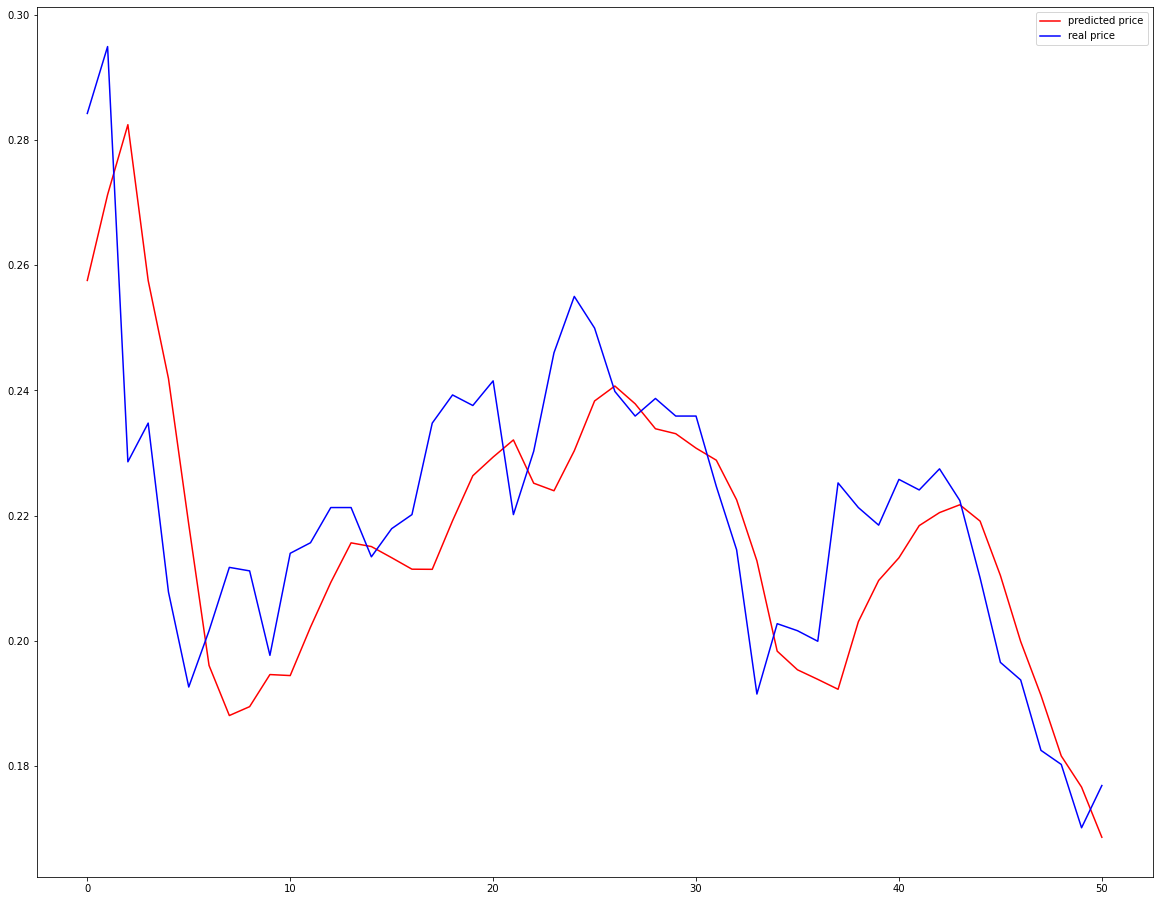

In [23]:

plt.figure(figsize = (20,16))
plt.plot(y_pred, color = 'red', label = 'predicted price')
plt.plot(y_test, color = 'blue', label = 'real price')
plt.legend()
plt.show()